In [1]:
from fastai.text.all import *
np.random.seed(45576)

In [2]:
path=untar_data(URLs.IMDB)
path.ls()

(#7) [Path('/root/.fastai/data/imdb/train'),Path('/root/.fastai/data/imdb/README'),Path('/root/.fastai/data/imdb/imdb.vocab'),Path('/root/.fastai/data/imdb/unsup'),Path('/root/.fastai/data/imdb/tmp_lm'),Path('/root/.fastai/data/imdb/test'),Path('/root/.fastai/data/imdb/tmp_clas')]

In [3]:
(path/"train").ls()

(#4) [Path('/root/.fastai/data/imdb/train/unsupBow.feat'),Path('/root/.fastai/data/imdb/train/pos'),Path('/root/.fastai/data/imdb/train/labeledBow.feat'),Path('/root/.fastai/data/imdb/train/neg')]

In [4]:
os.listdir(str(path))

['train', 'README', 'imdb.vocab', 'unsup', 'tmp_lm', 'test', 'tmp_clas']

In [5]:
# i trained the language model on kaggle(commit) as it took 6.54 hours !!!
!kaggle kernels output anujpanthri/fast-ai-language-model -p /path/to/dest

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# add your kaggle.json
!cp "kaggle.json" "/root/.kaggle/kaggle.json"

In [7]:
!kaggle kernels output anujpanthri/fast-ai-language-model -p /path/to/dest

Output file downloaded to /path/to/dest/dls_lm.vocab
Output file downloaded to /path/to/dest/finetuned.pth
Output file downloaded to /path/to/dest/one_epoch.pth
Kernel log downloaded to /path/to/dest/fast-ai-language-model.log 


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

# Pretraining Language Model

In [ ]:
# dls_lm=TextDataLoaders.from_folder(path,is_lm=True,valid_pct=0.1)

In [9]:
# dls_lm.show_batch(max_n=3)

In [ ]:
# learn = language_model_learner(dls_lm,AWD_LSTM,metrics=[accuracy, Perplexity],wd=0.1)

In [10]:
# learn.model

In [11]:
# learn.fit_one_cycle(1,lr_max=1e-2)

In [12]:
# learn.unfreeze()
# learn.fit_one_cycle(10, 1e-3)

In [13]:
# learn.save_encoder('finetuned')

In [ ]:
# TEXT = "I liked this movie because"
# N_WORDS = 40
# N_SENTENCES = 2
# preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
#          for _ in range(N_SENTENCES)]
# print("\n".join(preds))

i liked this movie because i liked it and liked it and note a little bit that i could n't care about . i just like to get much better . i did n't go to school and i think i hope that you can
i liked this movie because it is really not a brilliant movie . i feel the way it looks like it is an act of violence . It 's a very good movie . It does n't really have any scary moments in


In [ ]:
# # dls_lm.vocab
# with open("dls_lm.vocab",'wb') as f:
#     pickle.dump(dls_lm.vocab,f)

# Text Classifier

In [16]:
!ls 

dls_lm.vocab  fast-ai-language-model.log  finetuned.pth  one_epoch.pth


In [18]:
kaggle_dir="/path/to/dest/"

In [19]:
with open(kaggle_dir+'dls_lm.vocab','rb') as f:
  dls_lm_vocab=pickle.load(f)

In [20]:
dls_clas = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', text_vocab=dls_lm_vocab)

In [21]:
dls_clas.show_batch()

,text,category
0,"xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules of the match , both opponents have to go through tables in order to get the win . xxmaj benoit and xxmaj guerrero heated up early on by taking turns hammering first xxmaj spike and then xxmaj bubba xxmaj ray . a xxmaj german xxunk by xxmaj benoit to xxmaj bubba took the wind out of the xxmaj dudley brother . xxmaj spike tried to help his brother , but the referee restrained him while xxmaj benoit and xxmaj guerrero",pos
1,"xxbos xxmaj some have praised _ xxunk _ as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n\n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of many older adventure movies has been done well before , ( think _ the xxmaj dirty xxmaj dozen _ ) but _ atlantis _ represents one of the worse films in that motif . xxmaj the characters are weak . xxmaj even the background that each member trots out seems stock and awkward at best . xxmaj an xxup md / xxmaj medicine xxmaj man , a tomboy mechanic whose father always wanted sons , if we have not at least seen these before",neg
2,"xxbos xxmaj berlin - born in 1942 xxmaj margarethe von xxmaj trotta was an actress and now she is a very important director and writer . xxmaj she has been described , perhaps even unfairly caricatured , as a director whose commitment to bringing a woman 's sensibility to the screen outweighs her artistic strengths . "" rosenstrasse , "" which has garnered mixed and even strange reviews ( the xxmaj new xxmaj york xxmaj times article was one of the most negatively aggressive reviews xxmaj i 've ever read in that paper ) is not a perfect film . xxmaj it is a fine movie and a testament to a rare xxunk of successful opposition to the genocidal xxmaj nazi regime by , of all peoples , generically powerless xxmaj germans demonstrating in a xxmaj berlin street . \n\n xxmaj co - writer von xxmaj trotta uses the actual",pos
3,"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with the oddest possible scenarios to get the two protagonists together in the end . xxmaj in fact , all its charm is innate , contained within the characters and the setting and the plot … which is highly believable to boot . xxmaj it 's easy to think that such a love story , as beautiful as any other ever told , * could * happen to you … a feeling you do n't often get from other romantic comedies",pos
4,"xxbos xxup anchors xxup aweigh sees two eager young sailors , xxmaj joe xxmaj brady ( gene xxmaj kelly ) and xxmaj clarence xxmaj doolittle / xxmaj brooklyn ( frank xxmaj sinatra ) , get a special four - day shore leave . xxmaj eager to get to the girls , particularly xxmaj joe 's xxmaj lola , neither xxmaj joe nor xxmaj brooklyn figure on the interruption of little xxmaj navy - mad xxmaj donald ( dean xxmaj stockwell ) and his xxmaj aunt xxmaj susie ( kathryn xxmaj grayson ) . xxmaj unexperienced in the ways of females and courting , xxmaj brooklyn quickly enlists xxmaj joe to help him win xxmaj aunt xxmaj susie over . xxmaj along the way , however , xxmaj joe finds himself falling for the gal he thinks belongs to his best friend . xxmaj how is xxmaj brooklyn going to take",pos
5,"xxbos xxup myra xxup breckinridge is one of those rare

In [23]:
learn = text_classifier_learner(dls_clas,AWD_LSTM,metrics=[accuracy],drop_mult=0.5)
learn.load_encoder(kaggle_dir+'finetuned')

In [24]:
learn.fit_one_cycle(1,2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.239550,0.180113,0.930200,03:28


In [25]:
learn.freeze_to(-2)
learn.fit_one_cycle(1,slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.204012,0.161731,0.940960,03:59


In [26]:
learn.freeze_to(-3)
learn.fit_one_cycle(1,slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.181835,0.153244,0.944160,05:43


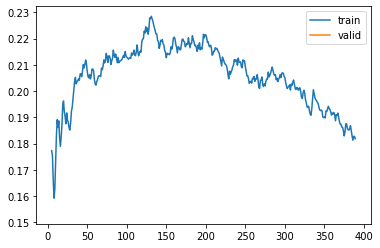

In [35]:
learn.recorder.plot_loss()

In [36]:
learn.save('best_model')
learn.save_encoder('best_model_encoder')

In [37]:
learn.unfreeze()
learn.fit_one_cycle(2,slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.147074,0.151335,0.944080,07:02
1,0.119361,0.148077,0.946720,07:10


In [38]:
learn.save('best_model_last_stage')
learn.save_encoder('best_model_last_stage_encoder')

In [53]:
preds=learn.predict("the movie had a few good scenes")
preds[0],preds[2].max().item()

('pos', 0.9520556330680847)

In [56]:
preds=learn.predict("the movie had a few bad scenes ")
preds[0],preds[2].max().item()

('neg', 0.5885395407676697)

In [60]:
preds=learn.predict("the movie had bad scenes")
preds[0],preds[2].max().item()

('neg', 0.8825053572654724)

In [58]:
preds=learn.predict("the movie had a few bad scenes overall the movie was great")
preds[0],preds[2].max().item()

('pos', 0.6435264348983765)